In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug= pd.read_csv(mouse_drug_data)
clinical_trial= pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
combined_data= clinical_trial.merge(mouse_drug, on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_response_avg = tumor_response.mean()

# Convert to DataFrame
tumor_response_avg = tumor_response_avg.reset_index()

# Preview DataFrame
tumor_response_avg

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_sem = tumor_response.sem()

# Convert to DataFrame
tumor_response_sem_df = pd.DataFrame(tumor_response_sem)

# Preview DataFrame
tumor_response_sem_df.reset_index(inplace=True)
tumor_response_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_avg_df = tumor_response_avg.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_response_avg_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


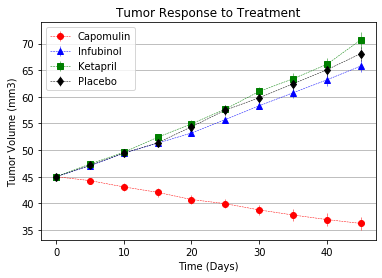

In [5]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    ste = tumor_response_sem[drug]
    tumor_treatment_plt = plt.errorbar(tumor_response_avg_df.index,tumor_response_avg_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
    
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
plt.grid(axis='y')

# Save the Figure
plt.savefig('plots/Tumor_Response.png')

# Show the Figure
plt.show()

# Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
metastatic_response_avg = metastatic_response.mean()

# Convert to DataFrame
metastatic_response_avg = pd.DataFrame(metastatic_response_avg)

# Preview DataFrame
metastatic_response_avg.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_sem = metastatic_response.sem()

# Convert to DataFrame
metastatic_response_sem_df = pd.DataFrame(metastatic_response_sem)

# Preview DataFrame
metastatic_response_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_avg=metastatic_response_avg.reset_index()
metastatic_response_avg_df = metastatic_response_avg.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_response_avg_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


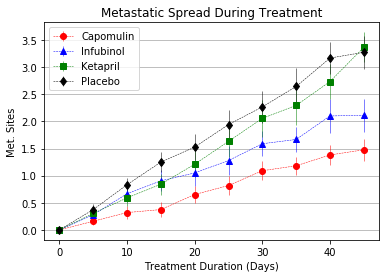

In [9]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format_list:
    ste = metastatic_response_sem[drug]
    metastatic_treatment_plt = plt.errorbar(metastatic_response_avg_df.index,metastatic_response_avg_df[drug],ste,
                                            fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
plt.grid(axis='y')

# Save the Figure
plt.savefig('plots/Metastic_Spread_During_Treatment.png')

# Show the Figure
plt.show()

# Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = combined_data.groupby(['Drug','Timepoint'])['Mouse ID']
survival_rates_count = survival_rates.nunique()
survival_rates_count = pd.DataFrame(survival_rates_count)

# Convert to DataFrame
survival_rates_count.reset_index(inplace=True)
survival_rates_count=survival_rates_count.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
survival_rates_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_count_df = survival_rates_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
survival_rates_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


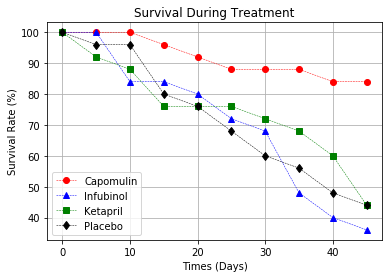

In [12]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_format_list:
    total_mouse = survival_rates_count_df[drug][0]
    survival_rate = (survival_rates_count_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(survival_rates_count_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=3)
plt.grid()

# Save the Figure
plt.savefig('plots/Survival_During_Treatment.png')

# Show the Figure
plt.show()

# Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percentage_change = (tumor_response_avg_df.iloc[-1]/(tumor_response_avg_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

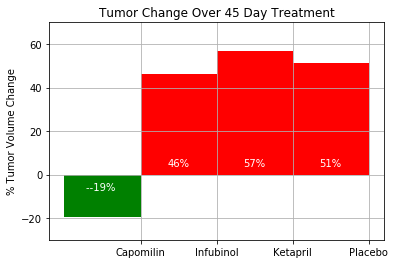

In [14]:
# Store all Relevant Percent Changes into a Tuple
pct_changes=(percentage_change['Capomulin'],
             percentage_change['Infubinol'],
             percentage_change['Ketapril'],
             percentage_change['Placebo'])

# Splice the data between passing and failing drugs
fig, ax=plt.subplots()
ind=np.arange(len(pct_changes))
width=1
rectsPass=ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail=ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind+0.5)
ax.set_xticklabels(('Capomilin','Infubinol','Ketapril','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig('plots/Summary_Bar_Graph.png')

# Show the Figure
fig.show()